MÁQUINA DE ATWOOD - SIMULACIÓN NUMÉRICA

Parámetros del sistema:
  Masa 1 (m1): 2.0 kg
  Masa 2 (m2): 1.8 kg
  Gravedad (g): 10.0 m/s²

Aceleración analítica del sistema: 0.5263 m/s²
Paso de tiempo (dt): 0.01 s
Tiempo total de simulación: 10.0 s

Iniciando simulación numérica...
Simulación completada exitosamente!

Resultados al tiempo t = 10.0 s:
  Posición (simulación): 26.3421 m
  Posición (analítica):  26.3158 m
  Error relativo:        0.1000%

  Velocidad (simulación): 5.2632 m/s
  Velocidad (analítica):  5.2632 m/s
  Error relativo:         0.0000%


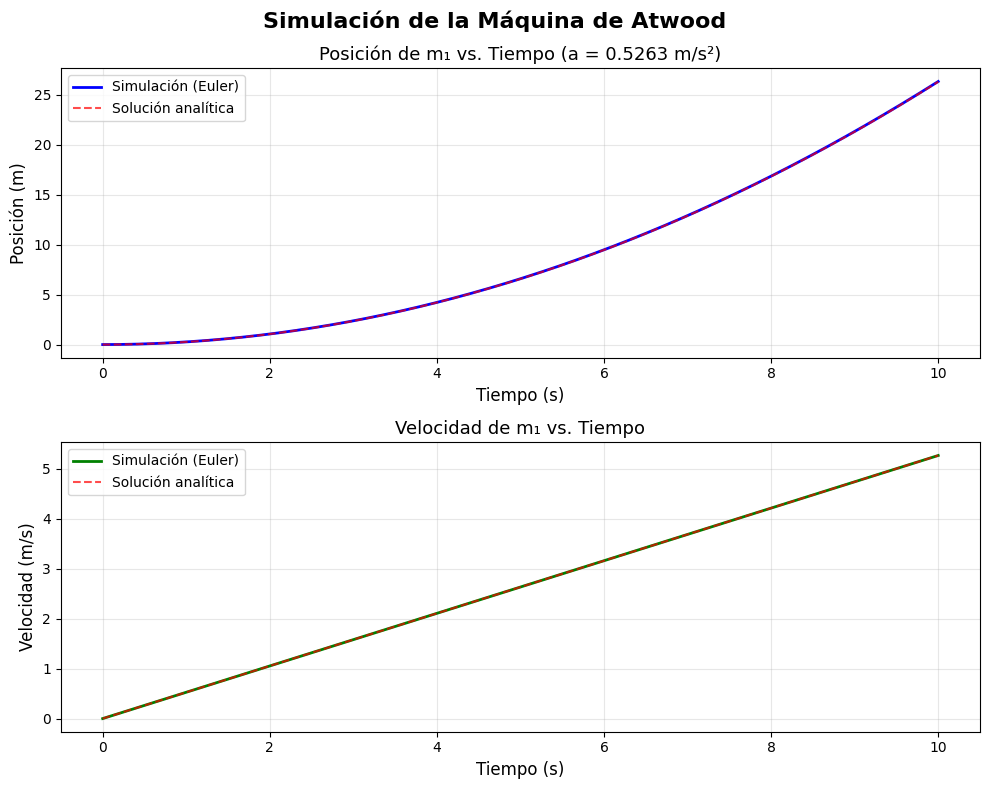


Gráficas generadas exitosamente.


In [1]:
# Simulación Numérica de la Máquina de Atwood
# Autor: Físico Computacional
# Descripción: Simulación de un sistema de Atwood ideal usando el Método de Euler

import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# SECCIÓN 1: PARÁMETROS DE SIMULACIÓN
# ============================================================================
# Definimos todos los parámetros físicos y numéricos del sistema

# Masas del sistema (kg)
m1 = 2.0  # Masa 1 (más pesada en este caso)
m2 = 1.8  # Masa 2 (más liviana)

# Constante gravitacional (m/s²)
g = 10.0

# Parámetros de tiempo para la simulación
tiempo_total = 10.0  # Duración total de la simulación (s)
dt = 0.01            # Paso de tiempo (s) - determina la precisión de la integración

# Condiciones iniciales
y0 = 0.0  # Posición inicial (m) - elegimos el origen como referencia
v0 = 0.0  # Velocidad inicial (m/s) - el sistema parte del reposo

# ============================================================================
# SECCIÓN 2: CÁLCULO ANALÍTICO DE LA ACELERACIÓN
# ============================================================================
# Usamos la fórmula derivada del análisis de fuerzas y la segunda ley de Newton
# Para una máquina de Atwood ideal: a = g(m1 - m2)/(m1 + m2)

a_analitica = g * (m1 - m2) / (m1 + m2)

print("=" * 60)
print("MÁQUINA DE ATWOOD - SIMULACIÓN NUMÉRICA")
print("=" * 60)
print(f"\nParámetros del sistema:")
print(f"  Masa 1 (m1): {m1} kg")
print(f"  Masa 2 (m2): {m2} kg")
print(f"  Gravedad (g): {g} m/s²")
print(f"\nAceleración analítica del sistema: {a_analitica:.4f} m/s²")
print(f"Paso de tiempo (dt): {dt} s")
print(f"Tiempo total de simulación: {tiempo_total} s")
print("=" * 60)

# ============================================================================
# SECCIÓN 3: INICIALIZACIÓN DE ARRAYS
# ============================================================================
# Calculamos el número de pasos de tiempo necesarios
n_pasos = int(tiempo_total / dt) + 1

# Creamos arrays de numpy para almacenar los resultados en cada instante
# Esto es más eficiente que usar listas de Python
t_array = np.zeros(n_pasos)  # Array de tiempo
y_array = np.zeros(n_pasos)  # Array de posición
v_array = np.zeros(n_pasos)  # Array de velocidad

# Establecemos las condiciones iniciales en el primer elemento (índice 0)
t_array[0] = 0.0
y_array[0] = y0
v_array[0] = v0

# ============================================================================
# SECCIÓN 4: BUCLE DE SIMULACIÓN - MÉTODO DE EULER
# ============================================================================
# El Método de Euler es un esquema de integración numérica de primer orden
# que aproxima la solución de ecuaciones diferenciales ordinarias (EDOs)
#
# Para nuestro sistema:
#   dv/dt = a (aceleración constante)
#   dy/dt = v (velocidad)
#
# La discretización de Euler es:
#   v(t + dt) = v(t) + a * dt
#   y(t + dt) = y(t) + v(t + dt) * dt
#
# Nota: Usamos la velocidad NUEVA para actualizar la posición (Euler semi-implícito)
# lo cual mejora la estabilidad del método para problemas mecánicos

print("\nIniciando simulación numérica...")

for i in range(n_pasos - 1):
    # Índice actual: i
    # Índice siguiente: i + 1
    
    # Paso 1: Actualizar el tiempo
    t_array[i + 1] = t_array[i] + dt
    
    # Paso 2: Actualizar la velocidad usando la aceleración constante
    # Fórmula de Euler: v_new = v_old + a * dt
    v_array[i + 1] = v_array[i] + a_analitica * dt
    
    # Paso 3: Actualizar la posición usando la velocidad recién calculada
    # Fórmula de Euler (semi-implícito): y_new = y_old + v_new * dt
    # Esto es más estable que usar v_old
    y_array[i + 1] = y_array[i] + v_array[i + 1] * dt

print("Simulación completada exitosamente!")

# ============================================================================
# SECCIÓN 5: CÁLCULO DE VALORES FINALES Y VERIFICACIÓN
# ============================================================================
# Calculamos algunos valores de interés al final de la simulación

y_final = y_array[-1]  # Posición final (último elemento del array)
v_final = v_array[-1]  # Velocidad final

# Para verificar, calculamos los valores analíticos esperados:
# y(t) = (1/2) * a * t²  (con y0 = 0, v0 = 0)
# v(t) = a * t
y_analitico_final = 0.5 * a_analitica * tiempo_total**2
v_analitico_final = a_analitica * tiempo_total

print(f"\nResultados al tiempo t = {tiempo_total} s:")
print(f"  Posición (simulación): {y_final:.4f} m")
print(f"  Posición (analítica):  {y_analitico_final:.4f} m")
print(f"  Error relativo:        {abs(y_final - y_analitico_final)/y_analitico_final * 100:.4f}%")
print(f"\n  Velocidad (simulación): {v_final:.4f} m/s")
print(f"  Velocidad (analítica):  {v_analitico_final:.4f} m/s")
print(f"  Error relativo:         {abs(v_final - v_analitico_final)/v_analitico_final * 100:.4f}%")

# ============================================================================
# SECCIÓN 6: GRAFICACIÓN DE RESULTADOS
# ============================================================================
# Creamos una figura con dos subgráficas para visualizar los resultados

# Configuración de la figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Simulación de la Máquina de Atwood', fontsize=16, fontweight='bold')

# -------- Gráfica 1: Posición vs. Tiempo --------
ax1.plot(t_array, y_array, 'b-', linewidth=2, label='Simulación (Euler)')
ax1.set_xlabel('Tiempo (s)', fontsize=12)
ax1.set_ylabel('Posición (m)', fontsize=12)
ax1.set_title(f'Posición de m₁ vs. Tiempo (a = {a_analitica:.4f} m/s²)', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Opcional: Agregar la solución analítica para comparación
t_analitico = np.linspace(0, tiempo_total, 100)
y_analitico = 0.5 * a_analitica * t_analitico**2
ax1.plot(t_analitico, y_analitico, 'r--', linewidth=1.5, 
         label='Solución analítica', alpha=0.7)
ax1.legend(fontsize=10)

# -------- Gráfica 2: Velocidad vs. Tiempo --------
ax2.plot(t_array, v_array, 'g-', linewidth=2, label='Simulación (Euler)')
ax2.set_xlabel('Tiempo (s)', fontsize=12)
ax2.set_ylabel('Velocidad (m/s)', fontsize=12)
ax2.set_title('Velocidad de m₁ vs. Tiempo', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

# Opcional: Agregar la solución analítica para comparación
v_analitico = a_analitica * t_analitico
ax2.plot(t_analitico, v_analitico, 'r--', linewidth=1.5, 
         label='Solución analítica', alpha=0.7)
ax2.legend(fontsize=10)

# Ajustamos el espaciado entre subgráficas
plt.tight_layout()

# Mostramos la figura
plt.show()

print("\n" + "=" * 60)
print("Gráficas generadas exitosamente.")
print("=" * 60)

# ============================================================================
# NOTAS ADICIONALES SOBRE EL MÉTODO DE EULER
# ============================================================================
# 
# VENTAJAS:
# - Simple de implementar y entender
# - Computacionalmente económico
# - Suficientemente preciso para pasos de tiempo pequeños
#
# LIMITACIONES:
# - Error de truncamiento O(dt²) por paso, O(dt) global
# - Puede acumular errores en simulaciones largas
# - Para mayor precisión, considerar métodos de orden superior:
#   * Runge-Kutta de 4º orden (RK4)
#   * Métodos adaptativos (scipy.integrate.odeint, solve_ivp)
#
# CONSEJOS PARA MEJORAR LA SIMULACIÓN:
# 1. Reducir dt para mayor precisión (compromiso con tiempo de cómputo)
# 2. Implementar RK4 para mejor convergencia
# 3. Agregar fricción o masa de la cuerda para mayor realismo
# 4. Visualizar la energía total del sistema (debe conservarse)
#
# ============================================================================